<a href="https://colab.research.google.com/github/nonyeezeh/Research-Project-Code/blob/main/code_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Network Model

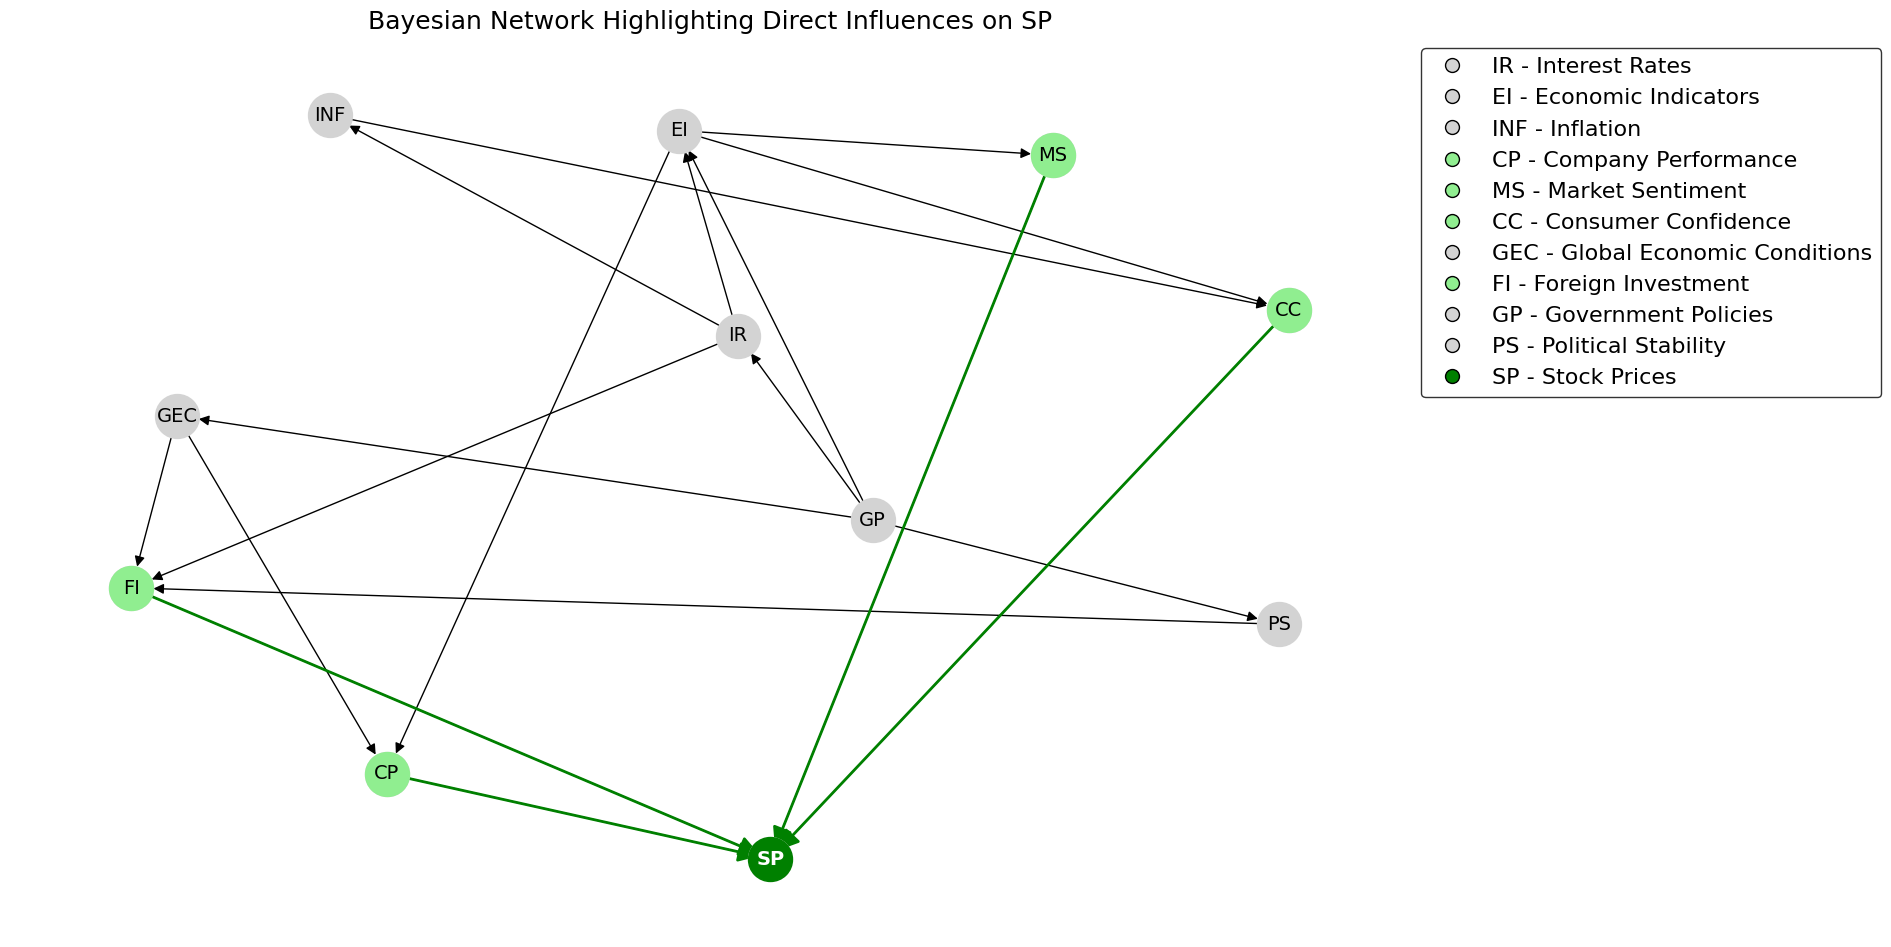

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 9))

G = nx.DiGraph()

G.add_node("IR", label="IR")
G.add_node("EI", label="EI")
G.add_node("INF", label="INF")
G.add_node("CP", label="CP")
G.add_node("MS", label="MS")
G.add_node("CC", label="CC")
G.add_node("GEC", label="GEC")
G.add_node("FI", label="FI")
G.add_node("GP", label="GP")
G.add_node("PS", label="PS")
G.add_node("SP", label="SP")

full_names = {
    "IR": "Interest Rates",
    "EI": "Economic Indicators",
    "INF": "Inflation",
    "CP": "Company Performance",
    "MS": "Market Sentiment",
    "CC": "Consumer Confidence",
    "GEC": "Global Economic Conditions",
    "FI": "Foreign Investment",
    "GP": "Government Policies",
    "PS": "Political Stability",
    "SP": "Stock Prices"
}

# Dependencies
edges = [
    ("IR", "EI"), ("IR", "INF"), ("IR", "FI"),
    ("INF", "CC"), ("EI", "MS"), ("EI", "CP"), ("EI", "CC"),
    ("GP", "EI"), ("GP", "IR"), ("GP", "GEC"), ("GP", "PS"),
    ("GEC", "CP"), ("GEC", "FI"), ("PS", "FI"),
    ("MS", "SP"), ("CP", "SP"), ("FI", "SP"), ("CC", "SP")
]

G.add_edges_from(edges)

directly_affecting_SP = {"CP", "FI", "MS", "CC"}
sp_node = "SP"

pos = nx.spring_layout(G, k=2)  # positions for all nodes

nx.draw(G, pos, node_size=1000, node_color='lightgray', arrows=True, arrowsize=15)

# Highlight specific nodes that affect SP and the node SP itself
nx.draw_networkx_nodes(G, pos, nodelist=directly_affecting_SP, node_color='lightgreen', node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=[sp_node], node_color='green', node_size=1000)

# Draw labels for the nodes except "SP" with a default color
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes() if node != 'SP'}, font_size=14, font_color='black')

# Draw the label for the "SP" node with a specific color
nx.draw_networkx_labels(G, pos, labels={'SP': 'SP'}, font_size=14, font_color='white', font_weight='bold')

# Highlight edges that affect SP directly
nx.draw_networkx_edges(G, pos, edgelist=[(u, sp_node) for u in directly_affecting_SP],
                       edge_color='green', width=2, arrows=True, arrowsize=30)

# Legend and legend colours
legend_colors = {
    "IR": "lightgray",
    "EI": "lightgray",
    "INF": "lightgray",
    "CP": "lightgreen",
    "MS": "lightgreen",
    "CC": "lightgreen",
    "GEC": "lightgray",
    "FI": "lightgreen",
    "GP": "lightgray",
    "PS": "lightgray",
    "SP": "green"
}

plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label=f"{abbr} - {name}",
               markersize=10, markerfacecolor=legend_colors[abbr], markeredgecolor='black')
    for abbr, name in full_names.items()
], loc='upper left', bbox_to_anchor=(1, 1), edgecolor='black', fontsize=16)

plt.title("Bayesian Network Highlighting Direct Influences on SP", fontsize=18)
plt.show()

# Bayesian Network Data Generation

In [3]:
import numpy as np
import pandas as pd

# Define the number of samples
num_samples = 10000

# Define the possible values for each variable
values = {
    'IR': ['low', 'medium', 'high'],
    'EI': ['poor', 'average', 'good'],
    'Inf': ['low', 'medium', 'high'],
    'MS': ['negative', 'neutral', 'positive'],
    'CP': ['poor', 'average', 'good'],
    'GEC': ['poor', 'average', 'good'],
    'GP': ['restrictive', 'neutral', 'supportive'],
    'PS': ['unstable', 'neutral', 'stable'],
    'CC': ['low', 'medium', 'high'],
    'FI': ['low', 'medium', 'high'],
    'SP': ['decrease', 'stable', 'increase']
}

# Function to sample Interest Rates (IR) given Government Policies (GP)
def sample_IR(gp):
    if gp == 'restrictive':
        return np.random.choice(values['IR'], p=[0.5, 0.3, 0.2])
    elif gp == 'neutral':
        return np.random.choice(values['IR'], p=[0.3, 0.4, 0.3])
    else:
        return np.random.choice(values['IR'], p=[0.2, 0.3, 0.5])

# Function to sample Economic Indicators (EI) given Interest Rates (IR) and Government Policies (GP)
def sample_EI(ir, gp):
    if gp == 'restrictive':
        if ir == 'low':
            return np.random.choice(values['EI'], p=[0.4, 0.4, 0.2])
        elif ir == 'medium':
            return np.random.choice(values['EI'], p=[0.5, 0.3, 0.2])
        else:
            return np.random.choice(values['EI'], p=[0.6, 0.2, 0.2])
    elif gp == 'neutral':
        if ir == 'low':
            return np.random.choice(values['EI'], p=[0.3, 0.5, 0.2])
        elif ir == 'medium':
            return np.random.choice(values['EI'], p=[0.4, 0.4, 0.2])
        else:
            return np.random.choice(values['EI'], p=[0.5, 0.3, 0.2])
    else:
        if ir == 'low':
            return np.random.choice(values['EI'], p=[0.2, 0.5, 0.3])
        elif ir == 'medium':
            return np.random.choice(values['EI'], p=[0.3, 0.5, 0.2])
        else:
            return np.random.choice(values['EI'], p=[0.4, 0.4, 0.2])

# Function to sample Inflation Rate (Inf) given Interest Rates (IR)
def sample_Inf(ir):
    if ir == 'low':
        return np.random.choice(values['Inf'], p=[0.6, 0.3, 0.1])
    elif ir == 'medium':
        return np.random.choice(values['Inf'], p=[0.3, 0.4, 0.3])
    else:
        return np.random.choice(values['Inf'], p=[0.1, 0.3, 0.6])

# Function to sample Market Sentiment (MS) given Economic Indicators (EI)
def sample_MS(ei):
    if ei == 'poor':
        return np.random.choice(values['MS'], p=[0.6, 0.3, 0.1])
    elif ei == 'average':
        return np.random.choice(values['MS'], p=[0.3, 0.4, 0.3])
    else:
        return np.random.choice(values['MS'], p=[0.1, 0.3, 0.6])

# Function to sample Company Performance (CP) given Economic Indicators (EI) and Global Economic Conditions (GEC)
def sample_CP(ei, gec):
    if ei == 'poor':
        if gec == 'poor':
            return np.random.choice(values['CP'], p=[0.7, 0.2, 0.1])
        elif gec == 'average':
            return np.random.choice(values['CP'], p=[0.6, 0.3, 0.1])
        else:
            return np.random.choice(values['CP'], p=[0.5, 0.4, 0.1])
    elif ei == 'average':
        if gec == 'poor':
            return np.random.choice(values['CP'], p=[0.5, 0.4, 0.1])
        elif gec == 'average':
            return np.random.choice(values['CP'], p=[0.4, 0.4, 0.2])
        else:
            return np.random.choice(values['CP'], p=[0.3, 0.5, 0.2])
    else:
        if gec == 'poor':
            return np.random.choice(values['CP'], p=[0.4, 0.4, 0.2])
        elif gec == 'average':
            return np.random.choice(values['CP'], p=[0.3, 0.5, 0.2])
        else:
            return np.random.choice(values['CP'], p=[0.2, 0.5, 0.3])

# Function to sample Global Economic Conditions (GEC) given Government Policies (GP)
def sample_GEC(gp):
    if gp == 'restrictive':
        return np.random.choice(values['GEC'], p=[0.5, 0.3, 0.2])
    elif gp == 'neutral':
        return np.random.choice(values['GEC'], p=[0.3, 0.4, 0.3])
    else:
        return np.random.choice(values['GEC'], p=[0.2, 0.3, 0.5])

# Function to sample Government Policies (GP)
def sample_GP():
    return np.random.choice(values['GP'], p=[0.3, 0.4, 0.3])

# Function to sample Political Stability (PS) given Government Policies (GP)
def sample_PS(gp):
    if gp == 'restrictive':
        return np.random.choice(values['PS'], p=[0.5, 0.3, 0.2])
    elif gp == 'neutral':
        return np.random.choice(values['PS'], p=[0.3, 0.4, 0.3])
    else:
        return np.random.choice(values['PS'], p=[0.2, 0.3, 0.5])

# Function to sample Consumer Confidence (CC) given Economic Indicators (EI) and Inflation Rate (Inf)
def sample_CC(ei, inf):
    if ei == 'poor':
        if inf == 'low':
            return np.random.choice(values['CC'], p=[0.4, 0.4, 0.2])
        elif inf == 'medium':
            return np.random.choice(values['CC'], p=[0.5, 0.3, 0.2])
        else:
            return np.random.choice(values['CC'], p=[0.6, 0.2, 0.2])
    elif ei == 'average':
        if inf == 'low':
            return np.random.choice(values['CC'], p=[0.3, 0.5, 0.2])
        elif inf == 'medium':
            return np.random.choice(values['CC'], p=[0.4, 0.4, 0.2])
        else:
            return np.random.choice(values['CC'], p=[0.5, 0.3, 0.2])
    else:
        if inf == 'low':
            return np.random.choice(values['CC'], p=[0.2, 0.5, 0.3])
        elif inf == 'medium':
            return np.random.choice(values['CC'], p=[0.3, 0.5, 0.2])
        else:
            return np.random.choice(values['CC'], p=[0.4, 0.4, 0.2])

# Function to sample Foreign Investment (FI) given Global Economic Conditions (GEC), Political Stability (PS), and Interest Rates (IR)
def sample_FI(gec, ps, ir):
    if gec == 'poor':
        if ps == 'unstable':
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.5, 0.3, 0.2])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.6, 0.2, 0.2])
            else:
                return np.random.choice(values['FI'], p=[0.7, 0.2, 0.1])
        elif ps == 'neutral':
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.4, 0.4, 0.2])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.5, 0.3, 0.2])
            else:
                return np.random.choice(values['FI'], p=[0.6, 0.3, 0.1])
        else:
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.3, 0.5, 0.2])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.4, 0.4, 0.2])
            else:
                return np.random.choice(values['FI'], p=[0.5, 0.4, 0.1])
    elif gec == 'average':
        if ps == 'unstable':
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.4, 0.4, 0.2])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.5, 0.3, 0.2])
            else:
                return np.random.choice(values['FI'], p=[0.6, 0.3, 0.1])
        elif ps == 'neutral':
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.3, 0.5, 0.2])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.4, 0.4, 0.2])
            else:
                return np.random.choice(values['FI'], p=[0.5, 0.3, 0.2])
        else:
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.2, 0.5, 0.3])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.3, 0.5, 0.2])
            else:
                return np.random.choice(values['FI'], p=[0.4, 0.4, 0.2])
    else:
        if ps == 'unstable':
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.3, 0.5, 0.2])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.4, 0.4, 0.2])
            else:
                return np.random.choice(values['FI'], p=[0.5, 0.4, 0.1])
        elif ps == 'neutral':
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.2, 0.5, 0.3])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.3, 0.5, 0.2])
            else:
                return np.random.choice(values['FI'], p=[0.4, 0.4, 0.2])
        else:
            if ir == 'low':
                return np.random.choice(values['FI'], p=[0.1, 0.5, 0.4])
            elif ir == 'medium':
                return np.random.choice(values['FI'], p=[0.2, 0.5, 0.3])
            else:
                return np.random.choice(values['FI'], p=[0.3, 0.5, 0.2])

# Function to sample Stock Prices (SP) given Market Sentiment (MS), Company Performance (CP), Consumer Confidence (CC), and Foreign Investment (FI)
def sample_SP(ms, cp, cc, fi):
    if ms == 'negative':
        if cp == 'poor':
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.7, 0.2, 0.1])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.6, 0.3, 0.1])
            else:
                return np.random.choice(values['SP'], p=[0.5, 0.4, 0.1])
        elif cp == 'average':
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.6, 0.3, 0.1])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.5, 0.4, 0.1])
            else:
                return np.random.choice(values['SP'], p=[0.4, 0.4, 0.2])
        else:
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.5, 0.4, 0.1])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.4, 0.4, 0.2])
            else:
                return np.random.choice(values['SP'], p=[0.3, 0.5, 0.2])
    elif ms == 'neutral':
        if cp == 'poor':
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.6, 0.3, 0.1])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.5, 0.4, 0.1])
            else:
                return np.random.choice(values['SP'], p=[0.4, 0.4, 0.2])
        elif cp == 'average':
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.5, 0.4, 0.1])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.4, 0.4, 0.2])
            else:
                return np.random.choice(values['SP'], p=[0.3, 0.5, 0.2])
        else:
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.4, 0.4, 0.2])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.3, 0.5, 0.2])
            else:
                return np.random.choice(values['SP'], p=[0.2, 0.5, 0.3])
    else:
        if cp == 'poor':
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.5, 0.4, 0.1])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.4, 0.4, 0.2])
            else:
                return np.random.choice(values['SP'], p=[0.3, 0.5, 0.2])
        elif cp == 'average':
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.4, 0.4, 0.2])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.3, 0.5, 0.2])
            else:
                return np.random.choice(values['SP'], p=[0.2, 0.5, 0.3])
        else:
            if cc == 'low' and fi == 'low':
                return np.random.choice(values['SP'], p=[0.3, 0.5, 0.2])
            elif cc == 'medium' and fi == 'medium':
                return np.random.choice(values['SP'], p=[0.2, 0.5, 0.3])
            else:
                return np.random.choice(values['SP'], p=[0.1, 0.5, 0.4])

# Generate the data
data = []

for _ in range(num_samples):
    gp = sample_GP()
    ir = sample_IR(gp)
    ei = sample_EI(ir, gp)
    inf = sample_Inf(ir)
    ms = sample_MS(ei)
    gec = sample_GEC(gp)
    cp = sample_CP(ei, gec)
    ps = sample_PS(gp)
    cc = sample_CC(ei, inf)
    fi = sample_FI(gec, ps, ir)
    sp = sample_SP(ms, cp, cc, fi)

    data.append([ir, ei, inf, ms, cp, gec, gp, ps, cc, fi, sp])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['IR', 'EI', 'Inf', 'MS', 'CP', 'GEC', 'GP', 'PS', 'CC', 'FI', 'SP'])

# Save the DataFrame to a CSV file
df.to_csv('bayesian_network_data_Forward_sampling.csv', index=False)

print(df.head())

       IR       EI     Inf        MS       CP      GEC           GP        PS  \
0    high  average    high  positive     good     poor      neutral    stable   
1     low     poor     low  positive     poor  average  restrictive    stable   
2  medium     good     low   neutral     poor  average      neutral   neutral   
3     low  average     low   neutral  average     poor  restrictive  unstable   
4    high  average  medium   neutral     good  average      neutral    stable   

       CC      FI        SP  
0    high  medium  increase  
1     low    high    stable  
2  medium    high  decrease  
3  medium     low    stable  
4     low  medium  increase  


# Neural Network Training